# 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
experiment_data=pd.merge(study_results, mouse_metadata, how = 'left', on ="Mouse ID")


# Display the data table for preview
experiment_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
experiment_data['Mouse ID'].nunique()

249

In [3]:
duplicate_data = experiment_data[experiment_data.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicate_data

array(['g989'], dtype=object)

In [4]:
clean_study_data_complete = experiment_data[experiment_data['Mouse ID'].isin(duplicate_data)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
clean_study_data_complete['Mouse ID'].nunique()

248

In [6]:
mean_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [7]:
summary_statistics=pd.DataFrame({
    'Mean Tumor Volume':mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': var_tumor,
    'Tumor Volume Std. Dev.': std_tumor,
    'Tumor Volume Std. Err.': sem_tumor
})

In [8]:
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
time_points_by_drug=clean_study_data_complete.groupby(['Drug Regimen'])['Timepoint'].count()

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

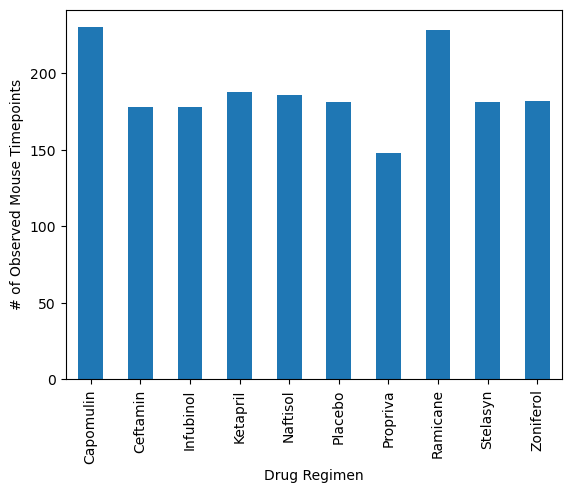

In [10]:
time_points_by_drug.plot(kind='bar',xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

In [11]:
time_points_by_drug_df = time_points_by_drug.reset_index(drop=False).rename(columns={'index':0})
time_points_by_drug_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [12]:
x_axis = np.arange(len(time_points_by_drug_df))
tick_locations = [value for value in x_axis]

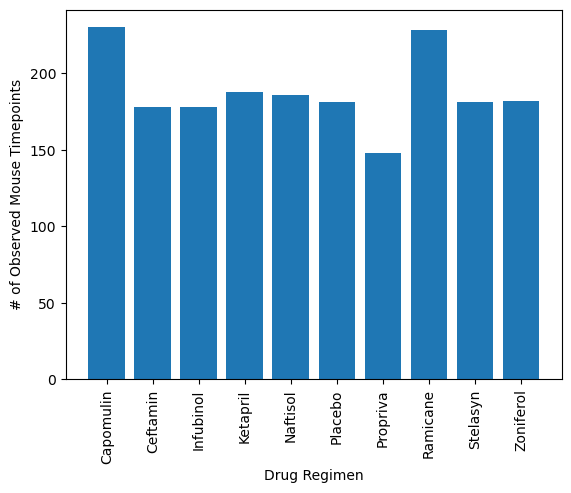

In [13]:
plt.bar(x_axis,time_points_by_drug_df['Timepoint'])
plt.xticks(tick_locations, time_points_by_drug_df["Drug Regimen"], rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()


In [21]:
gender_counts = experiment_data['Sex'].value_counts()
labels = gender_counts.index.tolist()

<AxesSubplot:ylabel='Sex'>

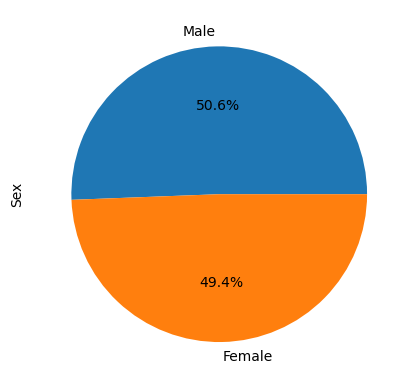

In [22]:
gender_counts.plot(kind='pie', y='Sex', labels=labels, autopct='%1.1f%%')

In [23]:
gender_counts = experiment_data['Sex'].value_counts()
gender_counts

Male      958
Female    935
Name: Sex, dtype: int64

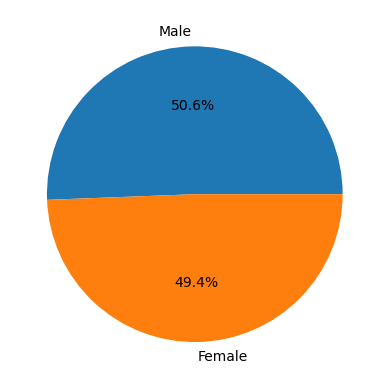

In [25]:
plt.pie(gender_counts, labels=labels,autopct='%1.1f%%')
plt.ylabel='Sex'